In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [6]:
# Load data from CSV file
df = pd.read_csv("sales_data.csv")

In [6]:
# Display first 5 rows
df.head()

,OrderID,Customer,Product,Quantity,Price,OrderDate
0,1001,Alice,Laptop,1,1200.50,2024-03-01
1,1002,Bob,Keyboard,2,45.99,2024-03-02
2,1003,Charlie,Mouse,3,25.75,2024-03-03
3,1004,David,Monitor,1,300.00,2024-03-04
4,1005,Emma,Headphones,2,79.99,2024-03-05


In [14]:
# Handle missing values
df.fillna({"Customer": "Unknown", "Product": "Unknown", "Quantity": 1, "Price": 0}, inplace=True) 
# inplace=True modifies the DataFrame directly instead of creating a copy
# Avoid empty customer names
# Avoid empty product names
# If missing, assume a minimum quantity of 1
# If missing, assume no charge for unknown prices

In [30]:
# Convert OrderDate column from string to datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"])


In [31]:
# Create a new column for Total Price to track total sales revenue per order
df["Total_Price"] = df["Quantity"] * df["Price"]

In [17]:
# Display transformed data
df.head()

,OrderID,Customer,Product,Quantity,Price,OrderDate,Total_Price
0,1001,Alice,Laptop,1,1200.50,2024-03-01,1200.50
1,1002,Bob,Keyboard,2,45.99,2024-03-02,91.98
2,1003,Charlie,Mouse,3,25.75,2024-03-03,77.25
3,1004,David,Monitor,1,300.00,2024-03-04,300.00
4,1005,Emma,Headphones,2,79.99,2024-03-05,159.98


In [18]:
df

,OrderID,Customer,Product,Quantity,Price,OrderDate,Total_Price
0,1001,Alice,Laptop,1,1200.50,2024-03-01,1200.50
1,1002,Bob,Keyboard,2,45.99,2024-03-02,91.98
2,1003,Charlie,Mouse,3,25.75,2024-03-03,77.25
3,1004,David,Monitor,1,300.00,2024-03-04,300.00
4,1005,Emma,Headphones,2,79.99,2024-03-05,159.98
5,1006,Frank,Keyboard,1,45.99,2024-03-06,45.99
6,1007,Grace,Mouse,2,25.75,2024-03-07,51.50
7,1008,Hannah,Laptop,1,1200.50,2024-03-08,1200.50
8,1009,Ian,Monitor,3,300.00,2024-03-09,900.00
9,1010,Jack,Headphones,1,79.99,2024-03-10,79.99


In [34]:
# Connect to SQLite database (creates file if not exists) If sales_data.db does not exist, it will be created automatically
conn = sqlite3.connect("sales_data.db")  # conn is the database connection object

In [35]:
# Create a cursor
cursor = conn.cursor() #cursor() is used to send commands to the database and fetch results
#This cursor object allows us to execute SQL commands
#Without it, we cannot send SQL queries to the database

In [37]:
#Now that we have a cursor, we can create tables, insert data, and query the database
# Create sales table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        OrderID INTEGER PRIMARY KEY,
        Customer TEXT,
        Product TEXT,
        Quantity INTEGER,
        Price REAL,
        OrderDate TEXT,
        Total_Price REAL
    )
""")

#execute() sends this SQL command to create a table
#The IF NOT EXISTS part ensures the table is created only if it doesn't already exist

In [38]:
# Commit changes After making any modifications (e.g., inserting data), we need to save changes to the database
conn.commit() #commit() permanently saves changes (like inserting, updating, or deleting records)
print("SQLite database and table created successfully!")

SQLite database and table created successfully!


In [23]:
# Load DataFrame into SQLite table
df.to_sql("sales", conn, if_exists="replace", index=False)

10

In [24]:
print("Data successfully loaded into SQLite database!")

Data successfully loaded into SQLite database!


In [40]:
# Query total revenue
query = "SELECT SUM(Total_Price) AS Total_Revenue FROM sales" #execute("SELECT * FROM sales") → Runs an SQL query Run SQL queries to analyze data stored in the SQLite database
total_revenue = pd.read_sql(query, conn) # Calculate total revenue from all sales
print("Total Revenue:")
print(total_revenue)

Total Revenue:
   Total_Revenue
0        4107.69


In [41]:
# Query top selling products
query = """
    SELECT Product, SUM(Quantity) AS Total_Units_Sold
    FROM sales
    GROUP BY Product
    ORDER BY Total_Units_Sold DESC
"""
top_products = pd.read_sql(query, conn)  #Identify top-selling products
print("\nTop Selling Products:")
print(top_products)


Top Selling Products:
      Product  Total_Units_Sold
0       Mouse                 5
1     Monitor                 4
2    Keyboard                 3
3  Headphones                 3
4      Laptop                 2


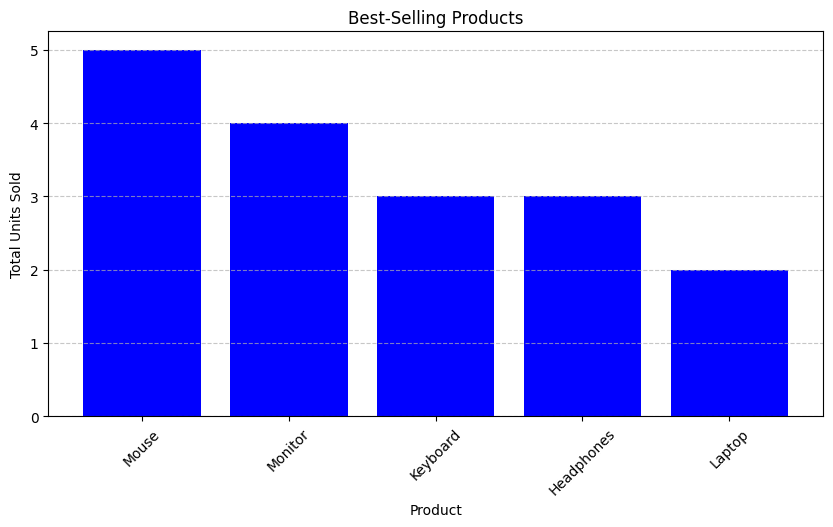

In [44]:

# Plot the best-selling products
plt.figure(figsize=(10,5))
plt.bar(top_products["Product"], top_products["Total_Units_Sold"], color='blue')
plt.xlabel("Product")
plt.ylabel("Total Units Sold")
plt.title("Best-Selling Products")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.show()


In [43]:
# Query daily sales trend Extract daily sales data from the SQLite database
sales_trend = pd.read_sql("SELECT OrderDate, SUM(Total_Price) AS Total_Sales FROM sales GROUP BY OrderDate", conn)
#Create a line graph to show revenue trends over time

In [28]:
# Convert OrderDate to datetime
sales_trend["OrderDate"] = pd.to_datetime(sales_trend["OrderDate"])

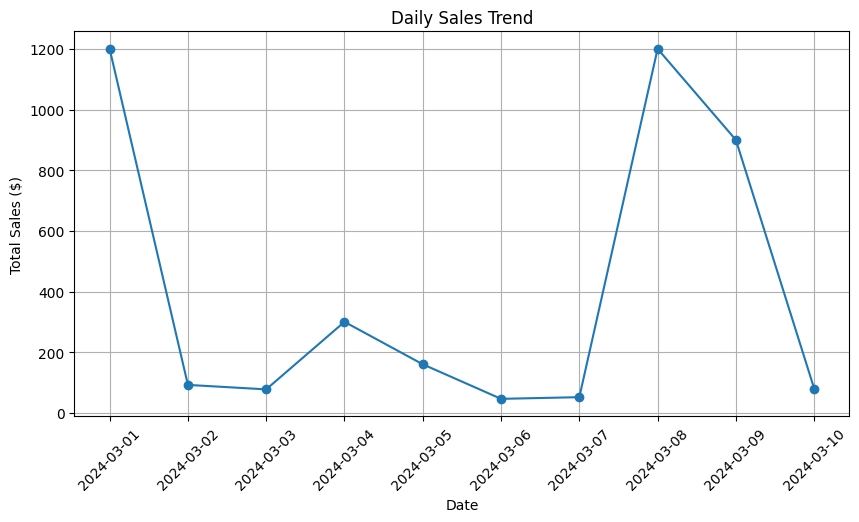

In [29]:
# Plot sales trend
plt.figure(figsize=(10,5))
plt.plot(sales_trend["OrderDate"], sales_trend["Total_Sales"], marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Daily Sales Trend")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()